# EDA 

## The strategy focuses on answering four key questions:

- Balance: Is the dataset balanced across the different vessel types?

- Duration: What is the length and variation of the audio clips?

- Diversity: How many unique ships are there, and do a few ships dominate the dataset?

- Features: What do the log-mel spectrograms (your chosen features) look like for each class?

---
Importing dependencies

In [1]:
# First, ensure librosa is installed. Uncomment and run this cell if needed.
# !pip install librosa

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import numpy as np

# --- Configuration & Setup ---
plt.style.use('seaborn-v0_8-whitegrid')
DATA_FILE = 'C:/Users/varun/OneDrive/Documents/gemini-cli-projects/Naval Acoustics Modelling/CNNs-Acoustics/Acoustic-Signal-Classification/data/Processed/master_metadata.csv'
audio_folder = 'C:/Users/varun/OneDrive/Documents/gemini-cli-projects/Naval Acoustics Modelling/CNNs-Acoustics/Acoustic-Signal-Classification/'


In [2]:
import os
print(os.getcwd())  # Print current working directory for debugging

c:\Users\varun\OneDrive\Documents\gemini-cli-projects\Naval Acoustics Modelling\CNNs-Acoustics\Acoustic-Signal-Classification\Notebooks


Loading the data, make sure columns are as intended

In [3]:

# Load the dataset
try:
    df = pd.read_csv(DATA_FILE,index_col=5)
    print("✅ Metadata loaded successfully.")
    print(f"Dataset shape: {df.shape[0]} samples, {df.shape[1]} columns.")
    print("\nFirst 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"❌ Error: The file '{DATA_FILE}' was not found. Please ensure it's in the same directory as your notebook.")
    # Exit if the file isn't found
    exit()


✅ Metadata loaded successfully.
Dataset shape: 63 samples, 8 columns.

First 5 rows:
                                     FilePath VesselType  ID  VesselID  \
Date                                                                     
20171114  data\Raw\DeepShip-main\Cargo\15.wav      Cargo  15        70   
20171118  data\Raw\DeepShip-main\Cargo\27.wav      Cargo  27        76   
20171123  data\Raw\DeepShip-main\Cargo\38.wav      Cargo  38        70   
20171124  data\Raw\DeepShip-main\Cargo\41.wav      Cargo  41        79   
20171125  data\Raw\DeepShip-main\Cargo\44.wav      Cargo  44        79   

                 VesselName    Time  Duration  ClipRange  
Date                                                      
20171114           NEW NADA  195740       187  1972-1333  
20171118    SEASPAN RELIANT   55532       196   980-1905  
20171123       ARIES LEADER    4508       348  1043-1734  
20171124  PRINCESS SUPERIOR  134001       406  1374-1945  
20171125  WESTWOOD COLUMBIA  120743       

---
Checking class imbalance


--- Generating Visualization 1: Class Distribution ---


C:\Users\varun\AppData\Local\Temp\ipykernel_153396\1415681178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='VesselType', order=class_order, palette='viridis')


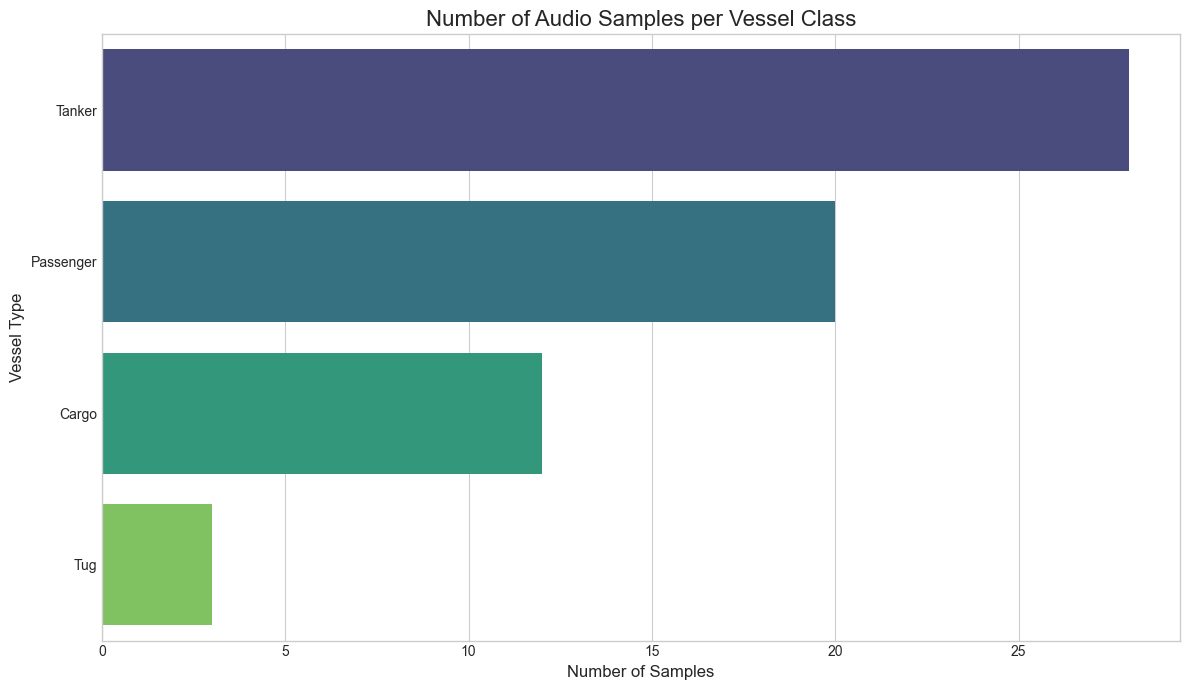

In [4]:

# --- 1. Visualization: Class Distribution ---
print("\n--- Generating Visualization 1: Class Distribution ---")
plt.figure(figsize=(12, 7))
class_order = df['VesselType'].value_counts().index
sns.countplot(data=df, y='VesselType', order=class_order, palette='viridis')
plt.title('Number of Audio Samples per Vessel Class', fontsize=16)
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Vessel Type', fontsize=12)
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show() # Disabled for automated run, but useful in notebook



---
Checking duration


--- Generating Visualization 2: Audio Clip Duration ---


C:\Users\varun\AppData\Local\Temp\ipykernel_153396\3233673682.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Duration', y='VesselType', order=class_order, ax=axes[1], palette='viridis')


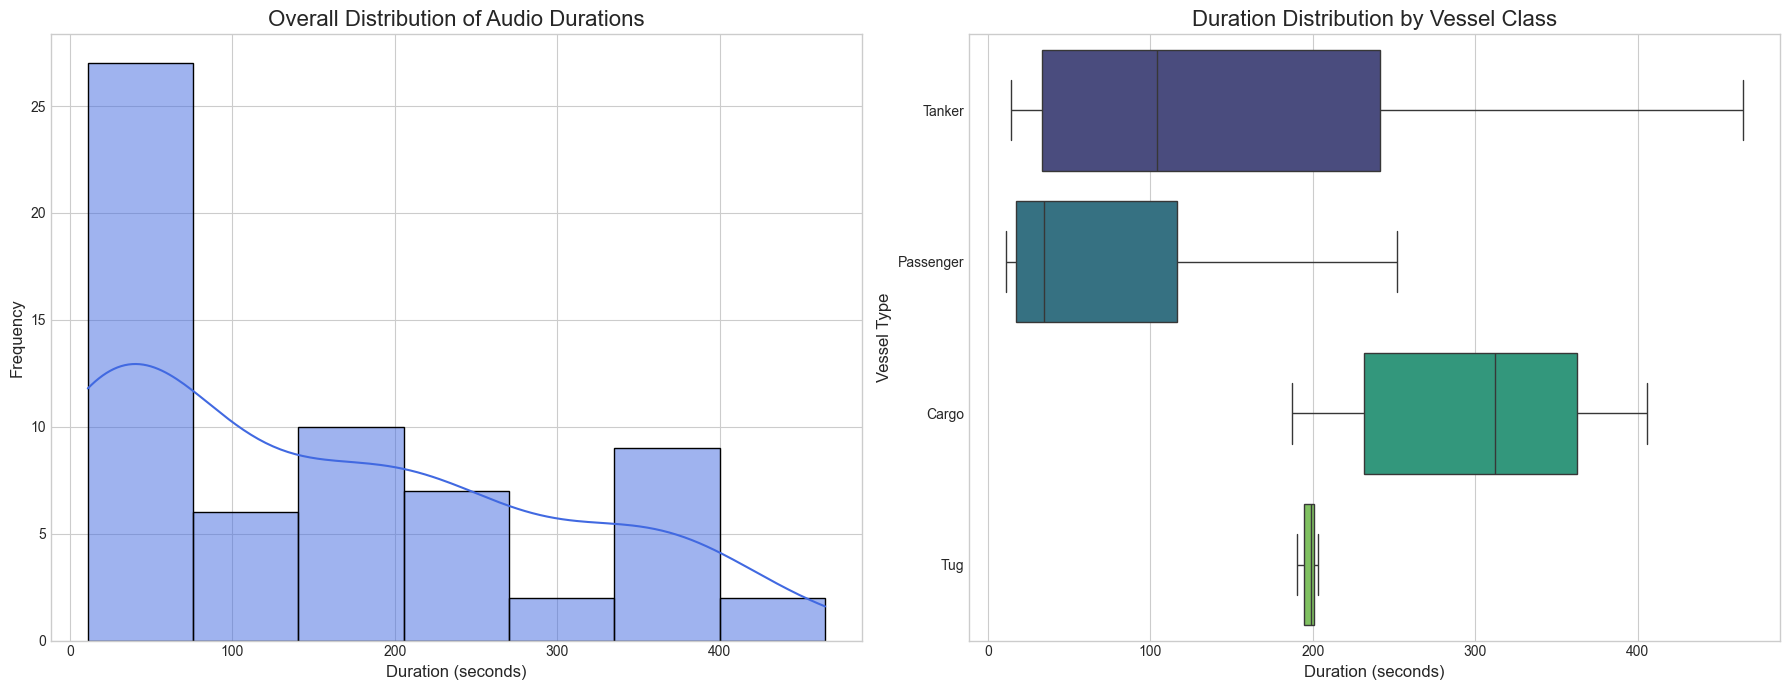

In [5]:

# --- 2. Visualization: Audio Clip Duration ---
print("\n--- Generating Visualization 2: Audio Clip Duration ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Histogram of all durations
sns.histplot(data=df, x='Duration', kde=True, ax=axes[0], color='royalblue')
axes[0].set_title('Overall Distribution of Audio Durations', fontsize=16)
axes[0].set_xlabel('Duration (seconds)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Box plot of durations per class
sns.boxplot(data=df, x='Duration', y='VesselType', order=class_order, ax=axes[1], palette='viridis')
axes[1].set_title('Duration Distribution by Vessel Class', fontsize=16)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Vessel Type', fontsize=12)

plt.tight_layout()
plt.savefig('duration_distribution.png')
plt.show() # Disabled for automated run, but useful in notebook

---
Recordings of Individual ships 


--- Generating Visualization 3: Recordings per Ship ---


C:\Users\varun\AppData\Local\Temp\ipykernel_153396\3654588292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_ships.index, x=top_20_ships.values, palette='plasma') ### might fail


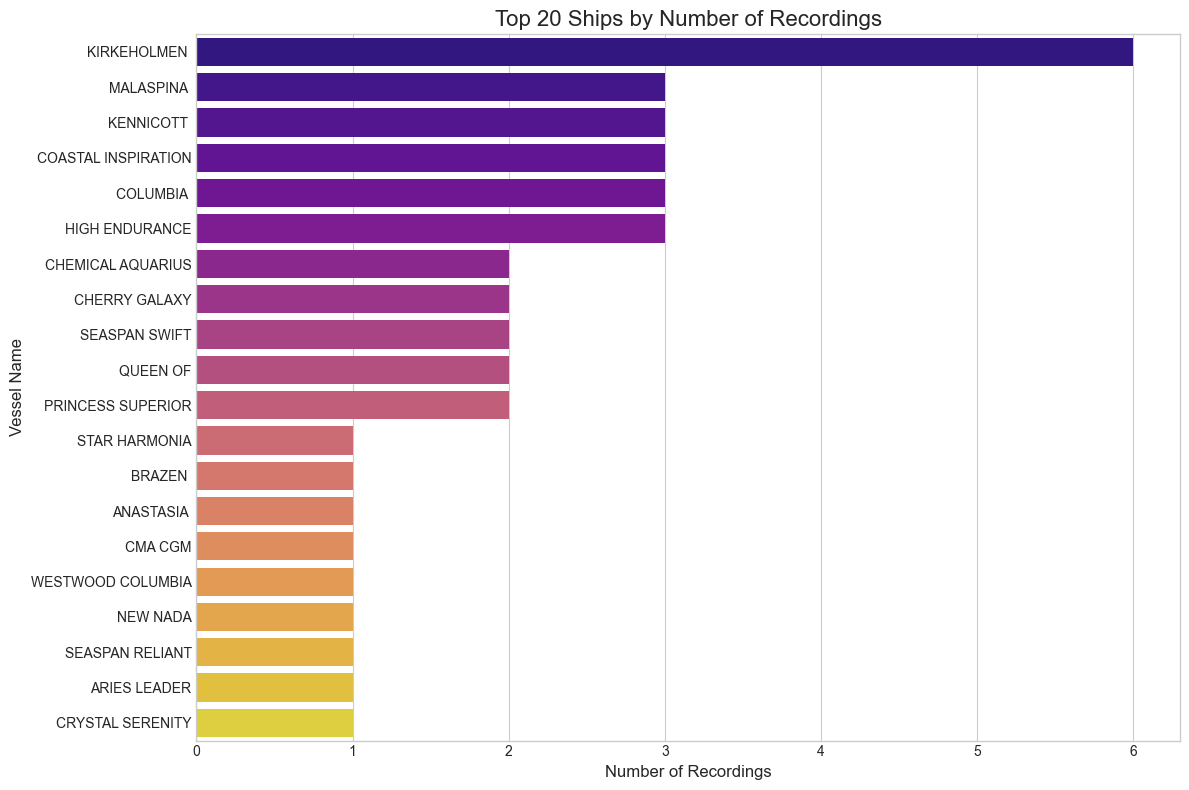

In [6]:

# --- 3. Visualization: Recordings per Individual Ship ---
print("\n--- Generating Visualization 3: Recordings per Ship ---")
plt.figure(figsize=(12, 8))
top_20_ships = df['VesselName'].value_counts().nlargest(20)
sns.barplot(y=top_20_ships.index, x=top_20_ships.values, palette='plasma') ### might fail
plt.title('Top 20 Ships by Number of Recordings', fontsize=16)
plt.xlabel('Number of Recordings', fontsize=12)
plt.ylabel('Vessel Name', fontsize=12)
plt.tight_layout()
plt.savefig('top_20_ships.png')
plt.show() # Disabled for automated run

---
Checking features: Log-Mel Spectrograms

In [8]:
df.columns

Index(['FilePath', 'VesselType', 'ID', 'VesselID', 'VesselName', 'Time',
       'Duration', 'ClipRange'],
      dtype='object')


--- Generating Visualization 4: Comparative Spectrograms ---


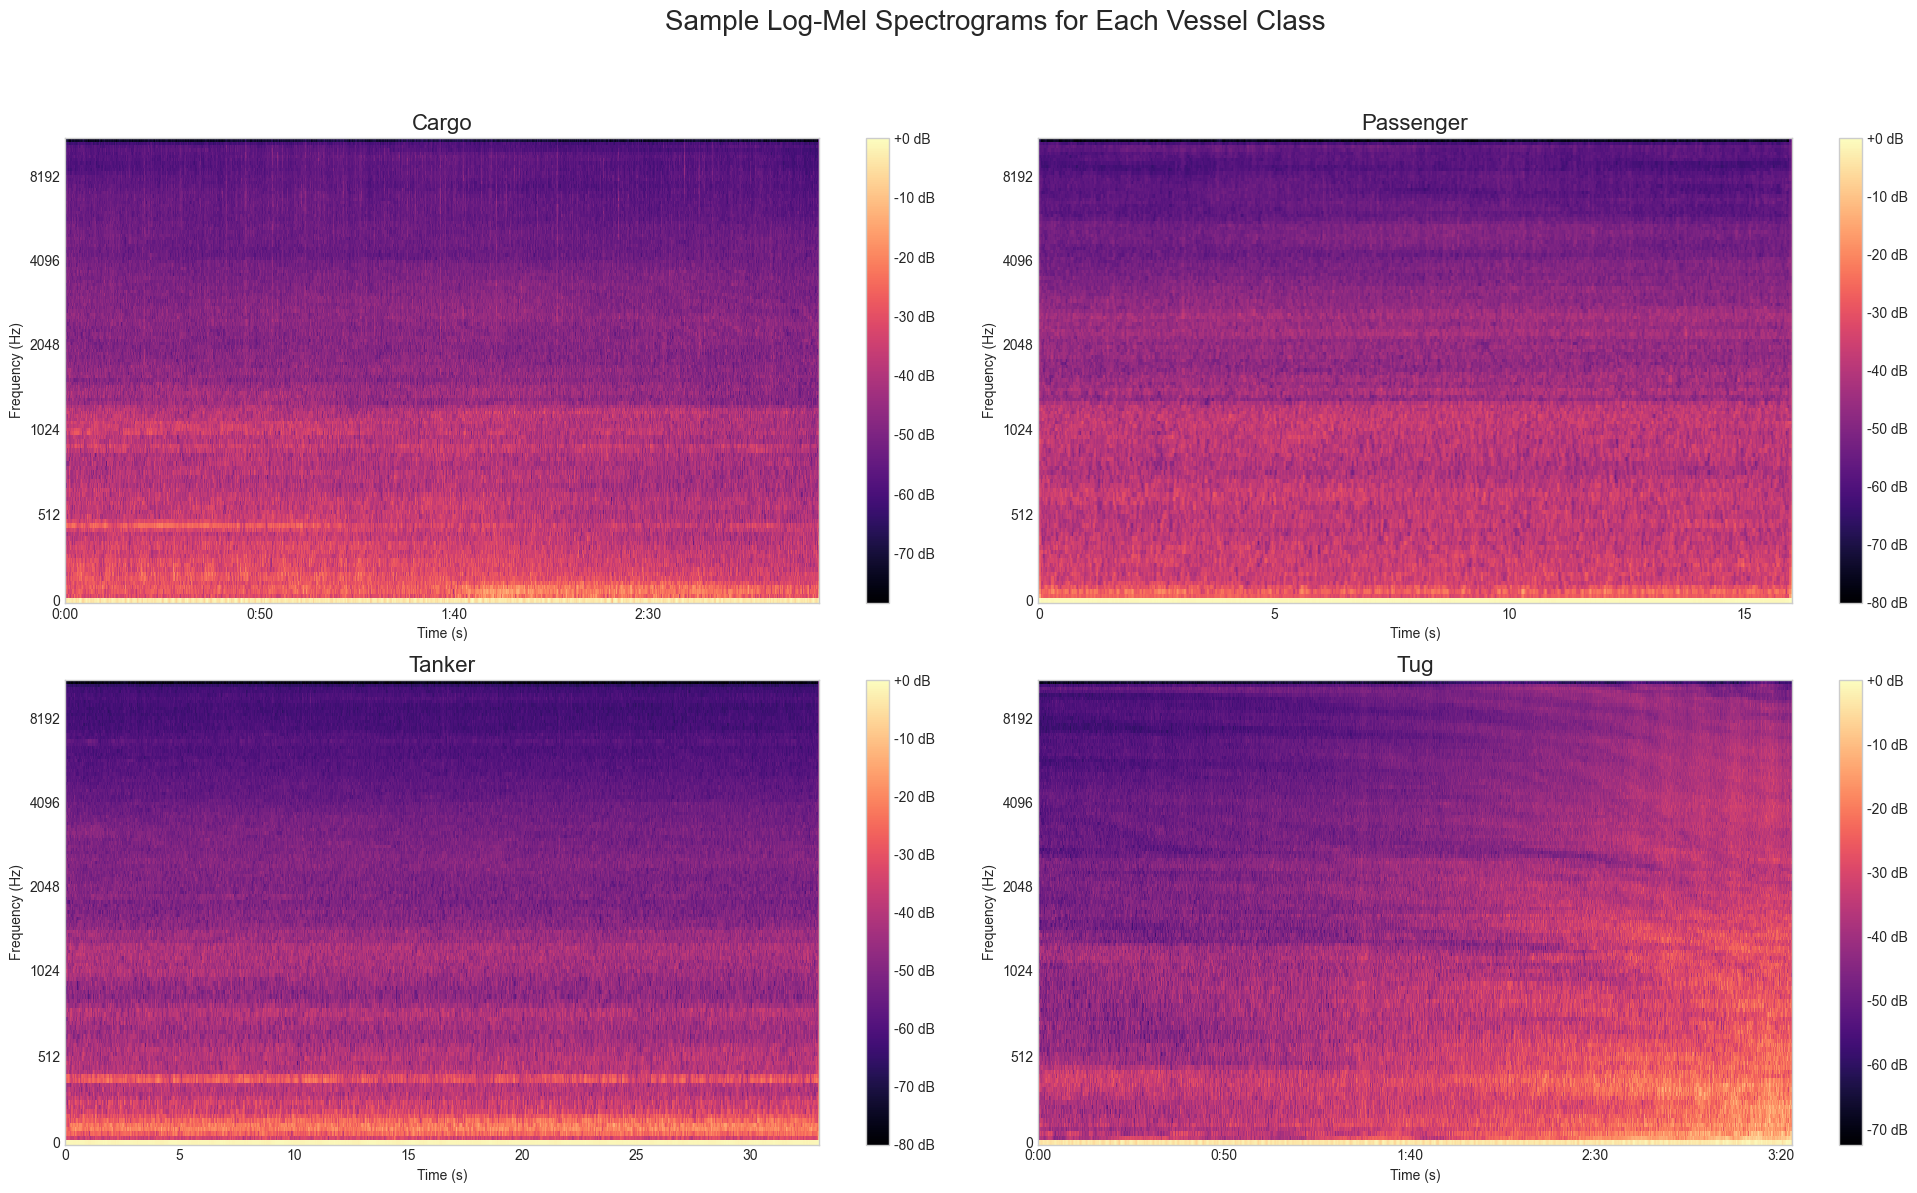

In [9]:
# --- 4. Visualization: Comparative Log-Mel Spectrograms ---
print("\n--- Generating Visualization 4: Comparative Spectrograms ---")
vessel_types = df['VesselType'].unique()
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Sample Log-Mel Spectrograms for Each Vessel Class', fontsize=20, y=1.02)
axes = axes.flatten()

for i, vessel in enumerate(vessel_types):
    ax = axes[i]
    # Get a random file for the current vessel type
    sample_row = df[df['VesselType'] == vessel].sample(1).iloc[0]
    audio_path = audio_folder + sample_row['FilePath']  # Adjusted to use the correct column name
    
    try:
        # Load audio
        y, sr = librosa.load(audio_path, sr=22050) # Resample to 22.05 kHz for consistency
        
        # Compute log-mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_db = librosa.power_to_db(S, ref=np.max)
        
        # Plot
        img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', ax=ax)
        ax.set_title(vessel, fontsize=16)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        
    except Exception as e:
        ax.set_title(f"Error loading {vessel} sample", fontsize=14)
        ax.text(0.5, 0.5, f"Could not load or process file:\n{audio_path.split('/')[-1]}", 
                ha='center', va='center', transform=ax.transAxes)

# Hide any unused subplots
for j in range(len(vessel_types), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=(0, 0.03, 1, 0.98))
plt.savefig('spectrogram_comparison.png')
plt.show() # Disabled for automated run